In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
filename = 'data_close.npz'

In [3]:
with np.load(filename, fix_imports=True, encoding='bytes') as data_close:
    shots = data_close['shots']
    data_dict = data_close['data'].all()
    data_dict['shot'] = shots

In [34]:
df = pd.DataFrame(data_dict, index=data_dict['shot'])
df.head()

,b'session_name',b'plasma_status',b'preionization',b'Ubd',b'Tcd',b'Tbd',b'pressure_request',shot,b'plasma',b'gas_filling',b'Ucd',b'plasma_life',b'transformator_saturation',b'Ub',b'loop_voltage_max'
5000,b'SessionPreparation/2011\n',b'',1.0,0.0,NaN,NaN,20.0,5000,NaN,1.0,650.0,NaN,NaN,1150.0,NaN
5001,b'Practica/FTTF/2010_2011\n',b'',1.0,0.0,NaN,NaN,20.0,5001,NaN,1.0,650.0,NaN,NaN,1100.0,NaN
5002,b'Practica/FTTF/2010_2011\n',b'OK\n',1.0,0.0,0.006,0.006,20.0,5002,1.0,1.0,650.0,0.00176,0.240655,1050.0,19.2920
5003,b'Practica/FTTF/2010_2011\n',b'OK\n',1.0,0.0,0.006,0.006,20.0,5003,1.0,1.0,650.0,0.02088,0.974712,1000.0,19.4069
5004,b'Practica/FTTF/2010_2011\n',b'OK\n',1.0,0.0,0.006,0.006,20.0,5004,1.0,1.0,650.0,0.00384,0.247323,950.0,19.3018


In [35]:
# Drop NaN
df = df.dropna()
# Drop vacuum discharges
df = df.drop(df[df[b'plasma_status'] != b'OK\n'].index)

In [36]:
# Drop too high or too low loop voltage (damaged signals)
df = df.drop(df[df[b'loop_voltage_max'] > 40].index)
df = df.drop(df[df[b'loop_voltage_max'] < 5].index)

In [37]:
# Drop too low Ucd or Ubd (again some error)
df = df.drop(df[df[b'Ucd'] < 10].index)
df = df.drop(df[df[b'Ub'] < 10].index)


In [38]:
# Drop too long plasma (suspicious)
df = df.drop(df[ df[b'plasma_life'] >17e-3 ].index)

In [41]:
df.size

36570

In [ ]:
# Drop too saturated transformer (probably flase detect)
df = df.drop(df[ df[b'transformator_saturation'] > 0.8 ].index)

In [42]:

# remove problematic sessions
#    ind &= array( [ False if re.match('^Technological/(DAS|Technological|Problems|Software|Repairs)',
#		    data_dict['session_name'][i]) else True  for i in range(N)] )


In [43]:
df.size

35820

<IPython.core.display.Javascript object>


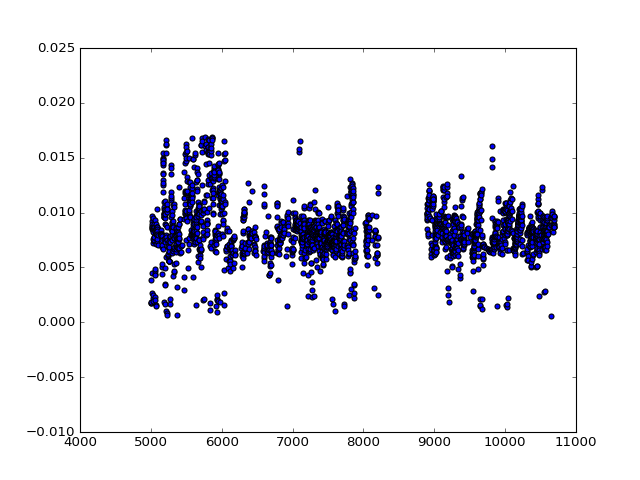

In [55]:
plt.scatter(df.index, df[b'plasma_life'])